In [3]:
!nvidia-smi

Tue Feb 20 19:13:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="xEgKbSI107qzW0yhrhwm")
project = rf.workspace("coinsvision").project("jordan-coins-detection-nqdbs")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
# change the 'train' to the last 'train' (like 'train2', 'train3', etc..)
!yolo task=detect mode=train model="/content/drive/MyDrive/Coins JD Object Detection & Counting/runs/detect/train6/weights/best.pt" data="{dataset.location}/data.yaml" epochs=50 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Coins JD Object Detection & Counting/runs/detect/train6/weights/best.pt, data=/content/drive/.shortcut-targets-by-id/1M6Xs8gOXXYNLH_0bOvekY60jFeT08_Mz/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=

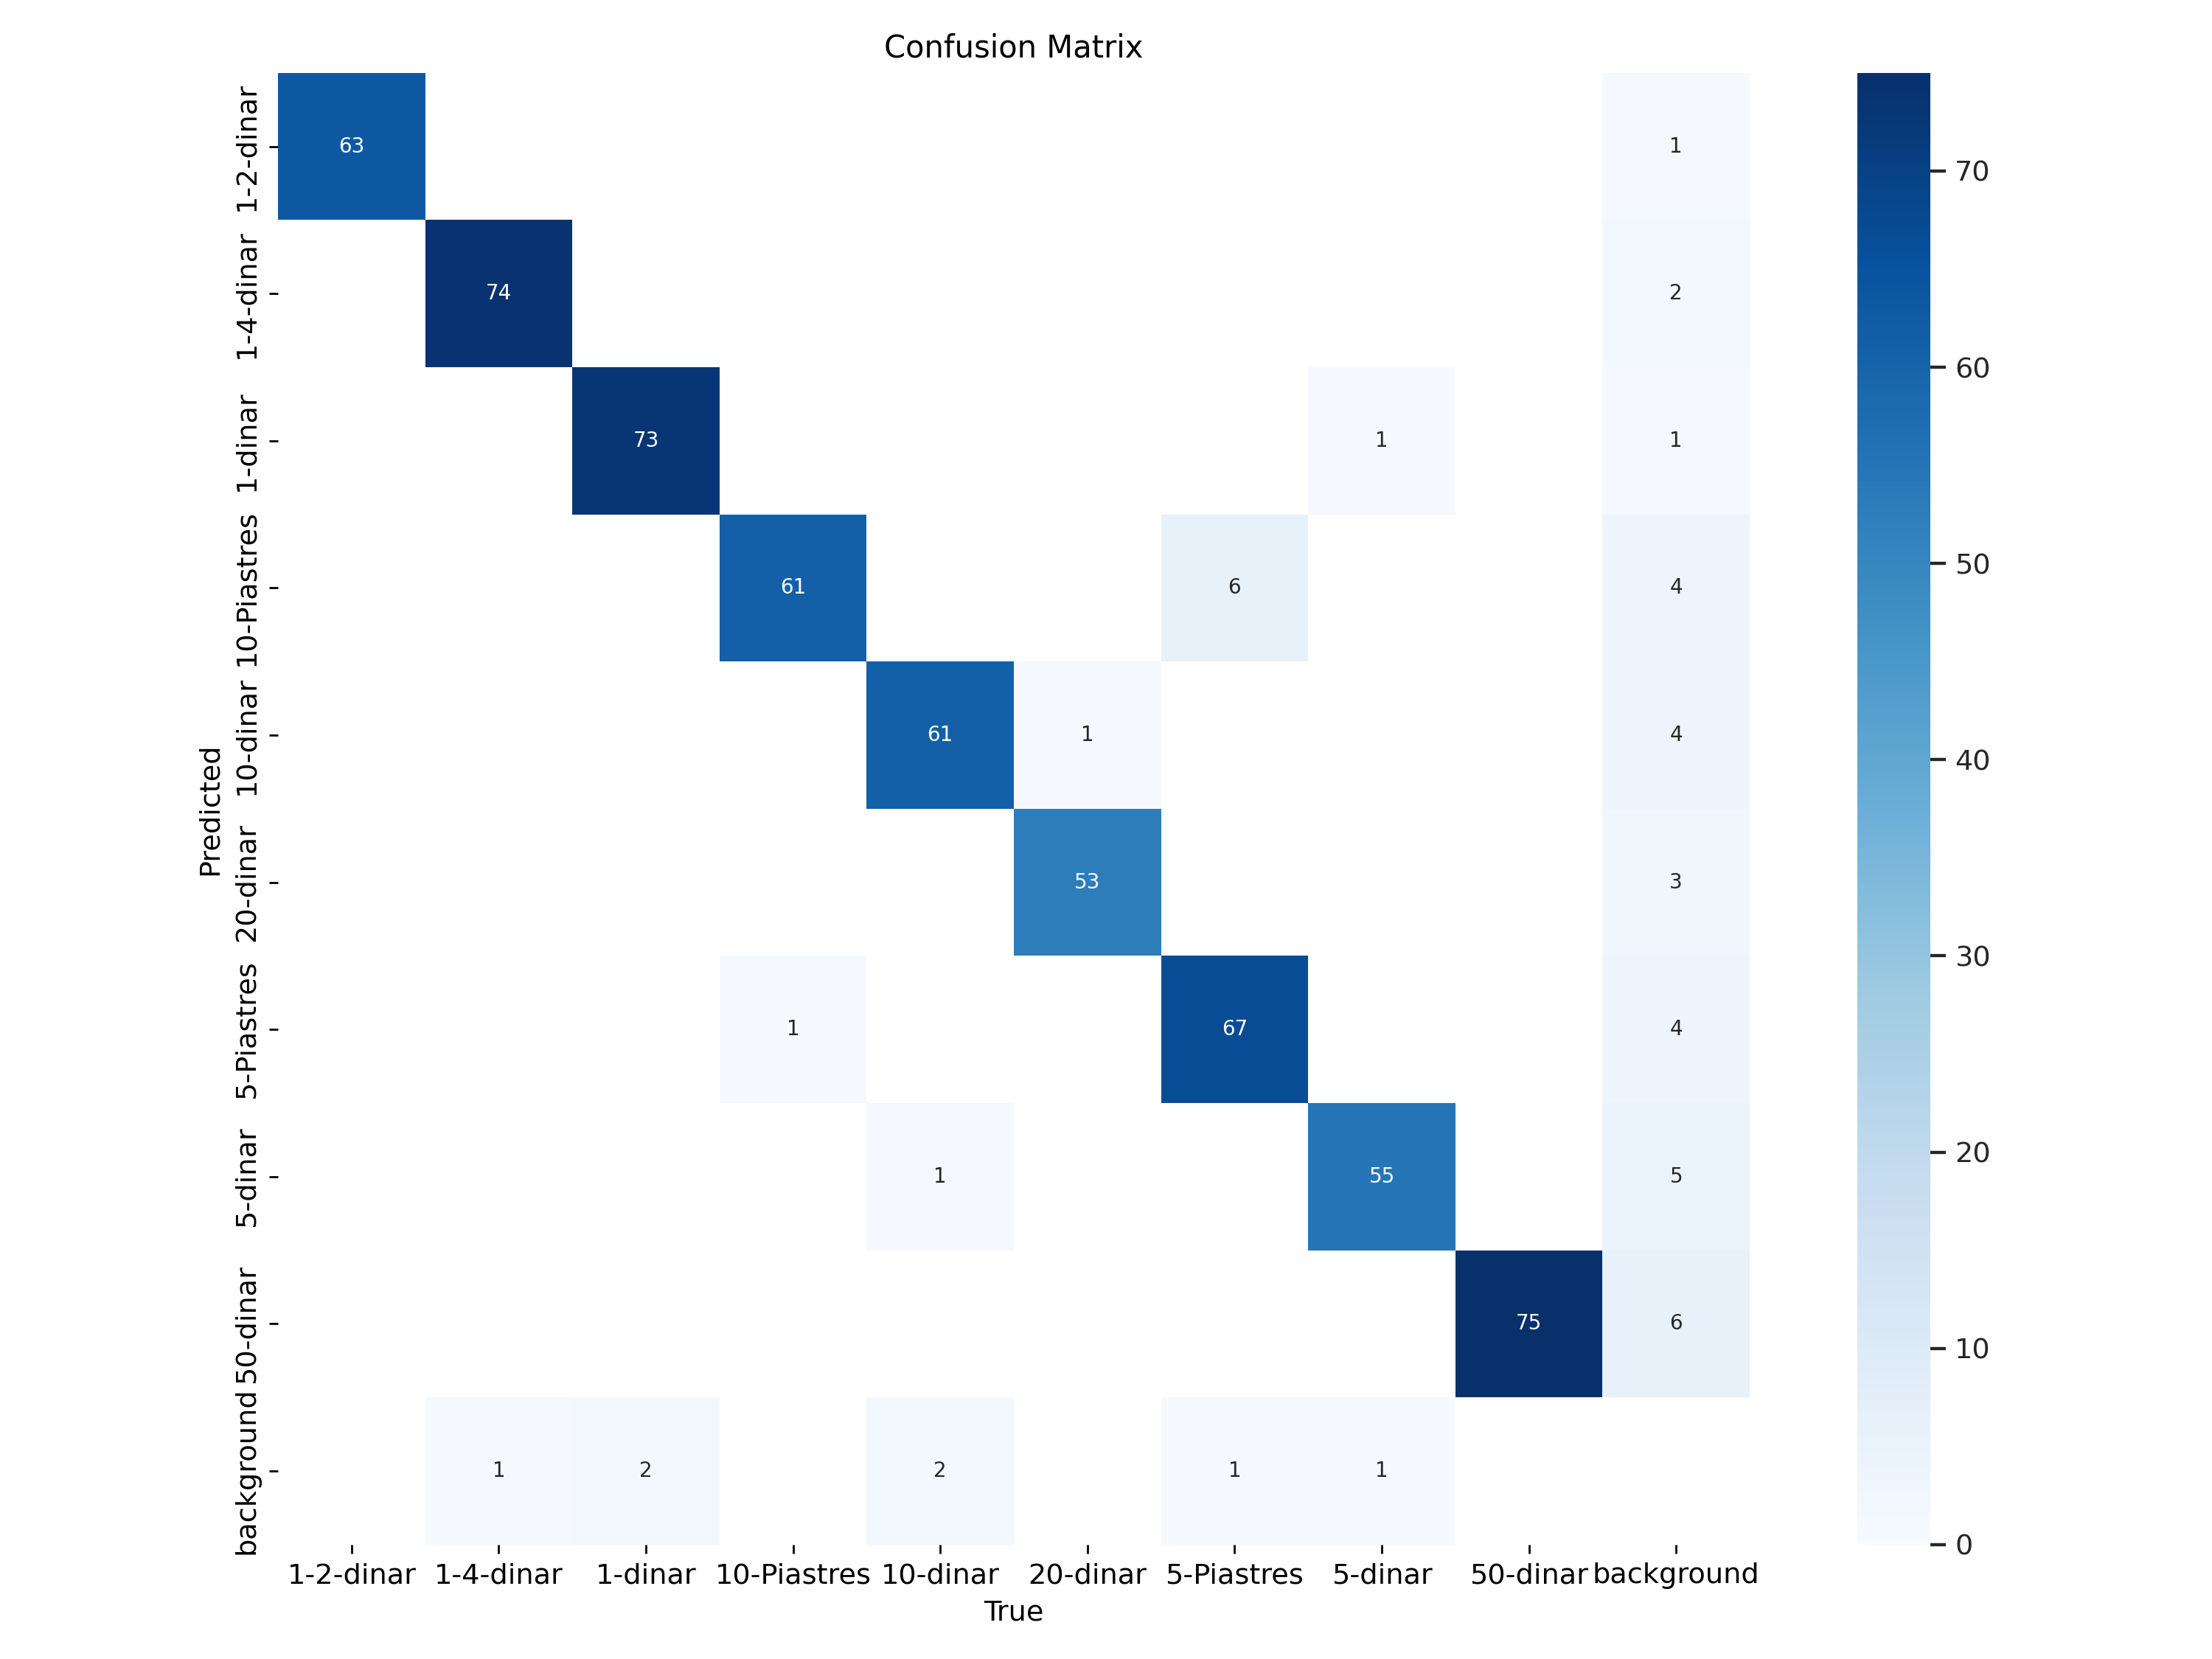

In [9]:
Image(filename='runs/detect/train7/confusion_matrix.png', width=600)

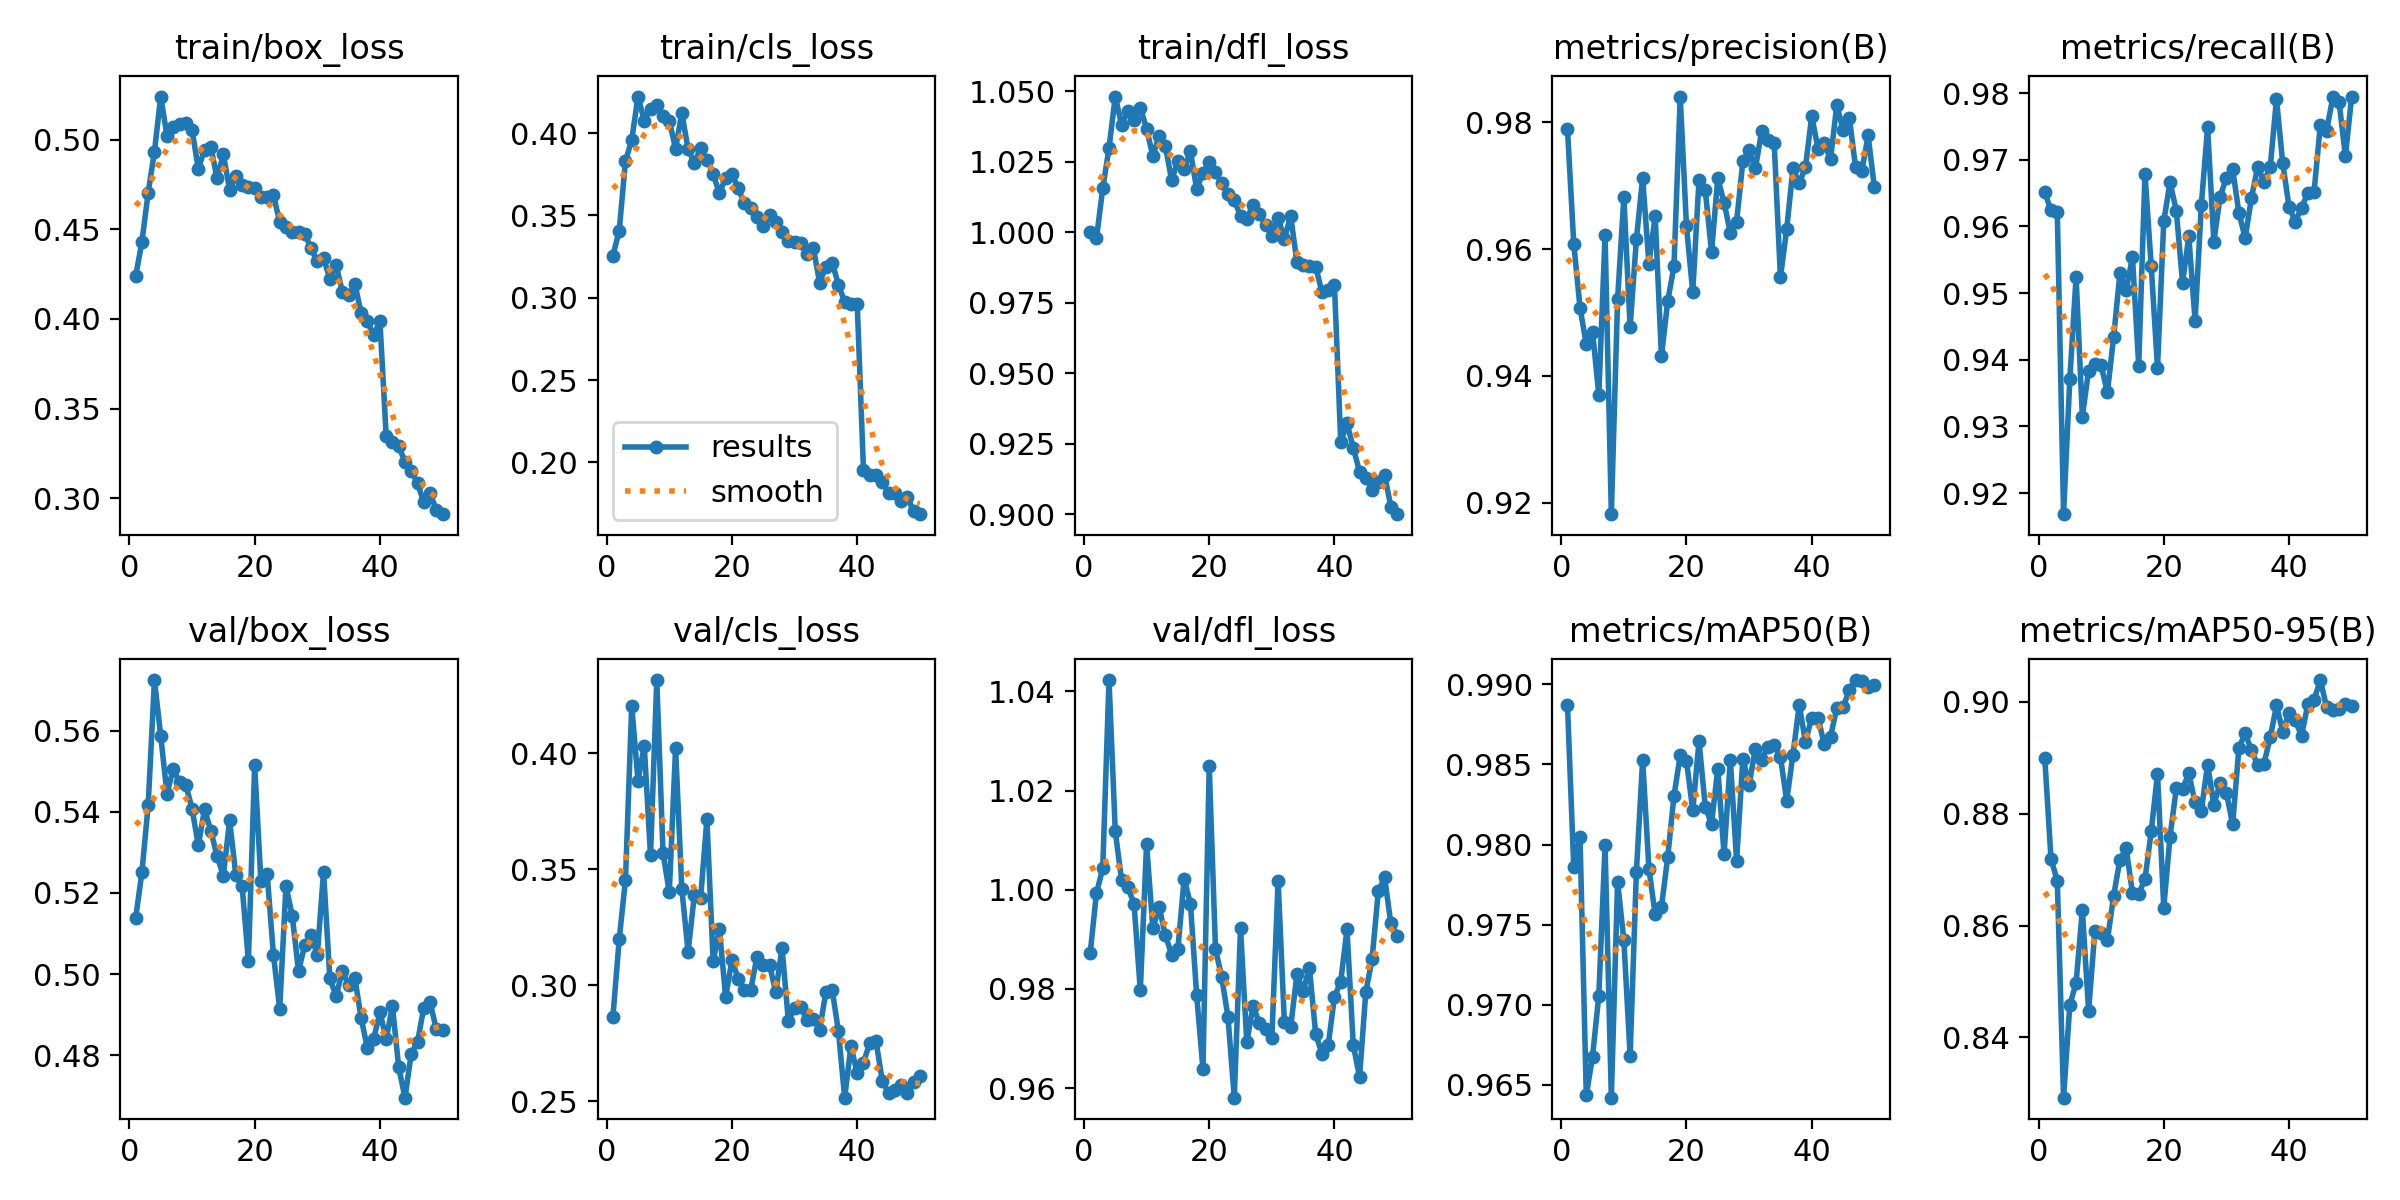

In [20]:
Image(filename='runs/detect/train7/results.png', width=600)

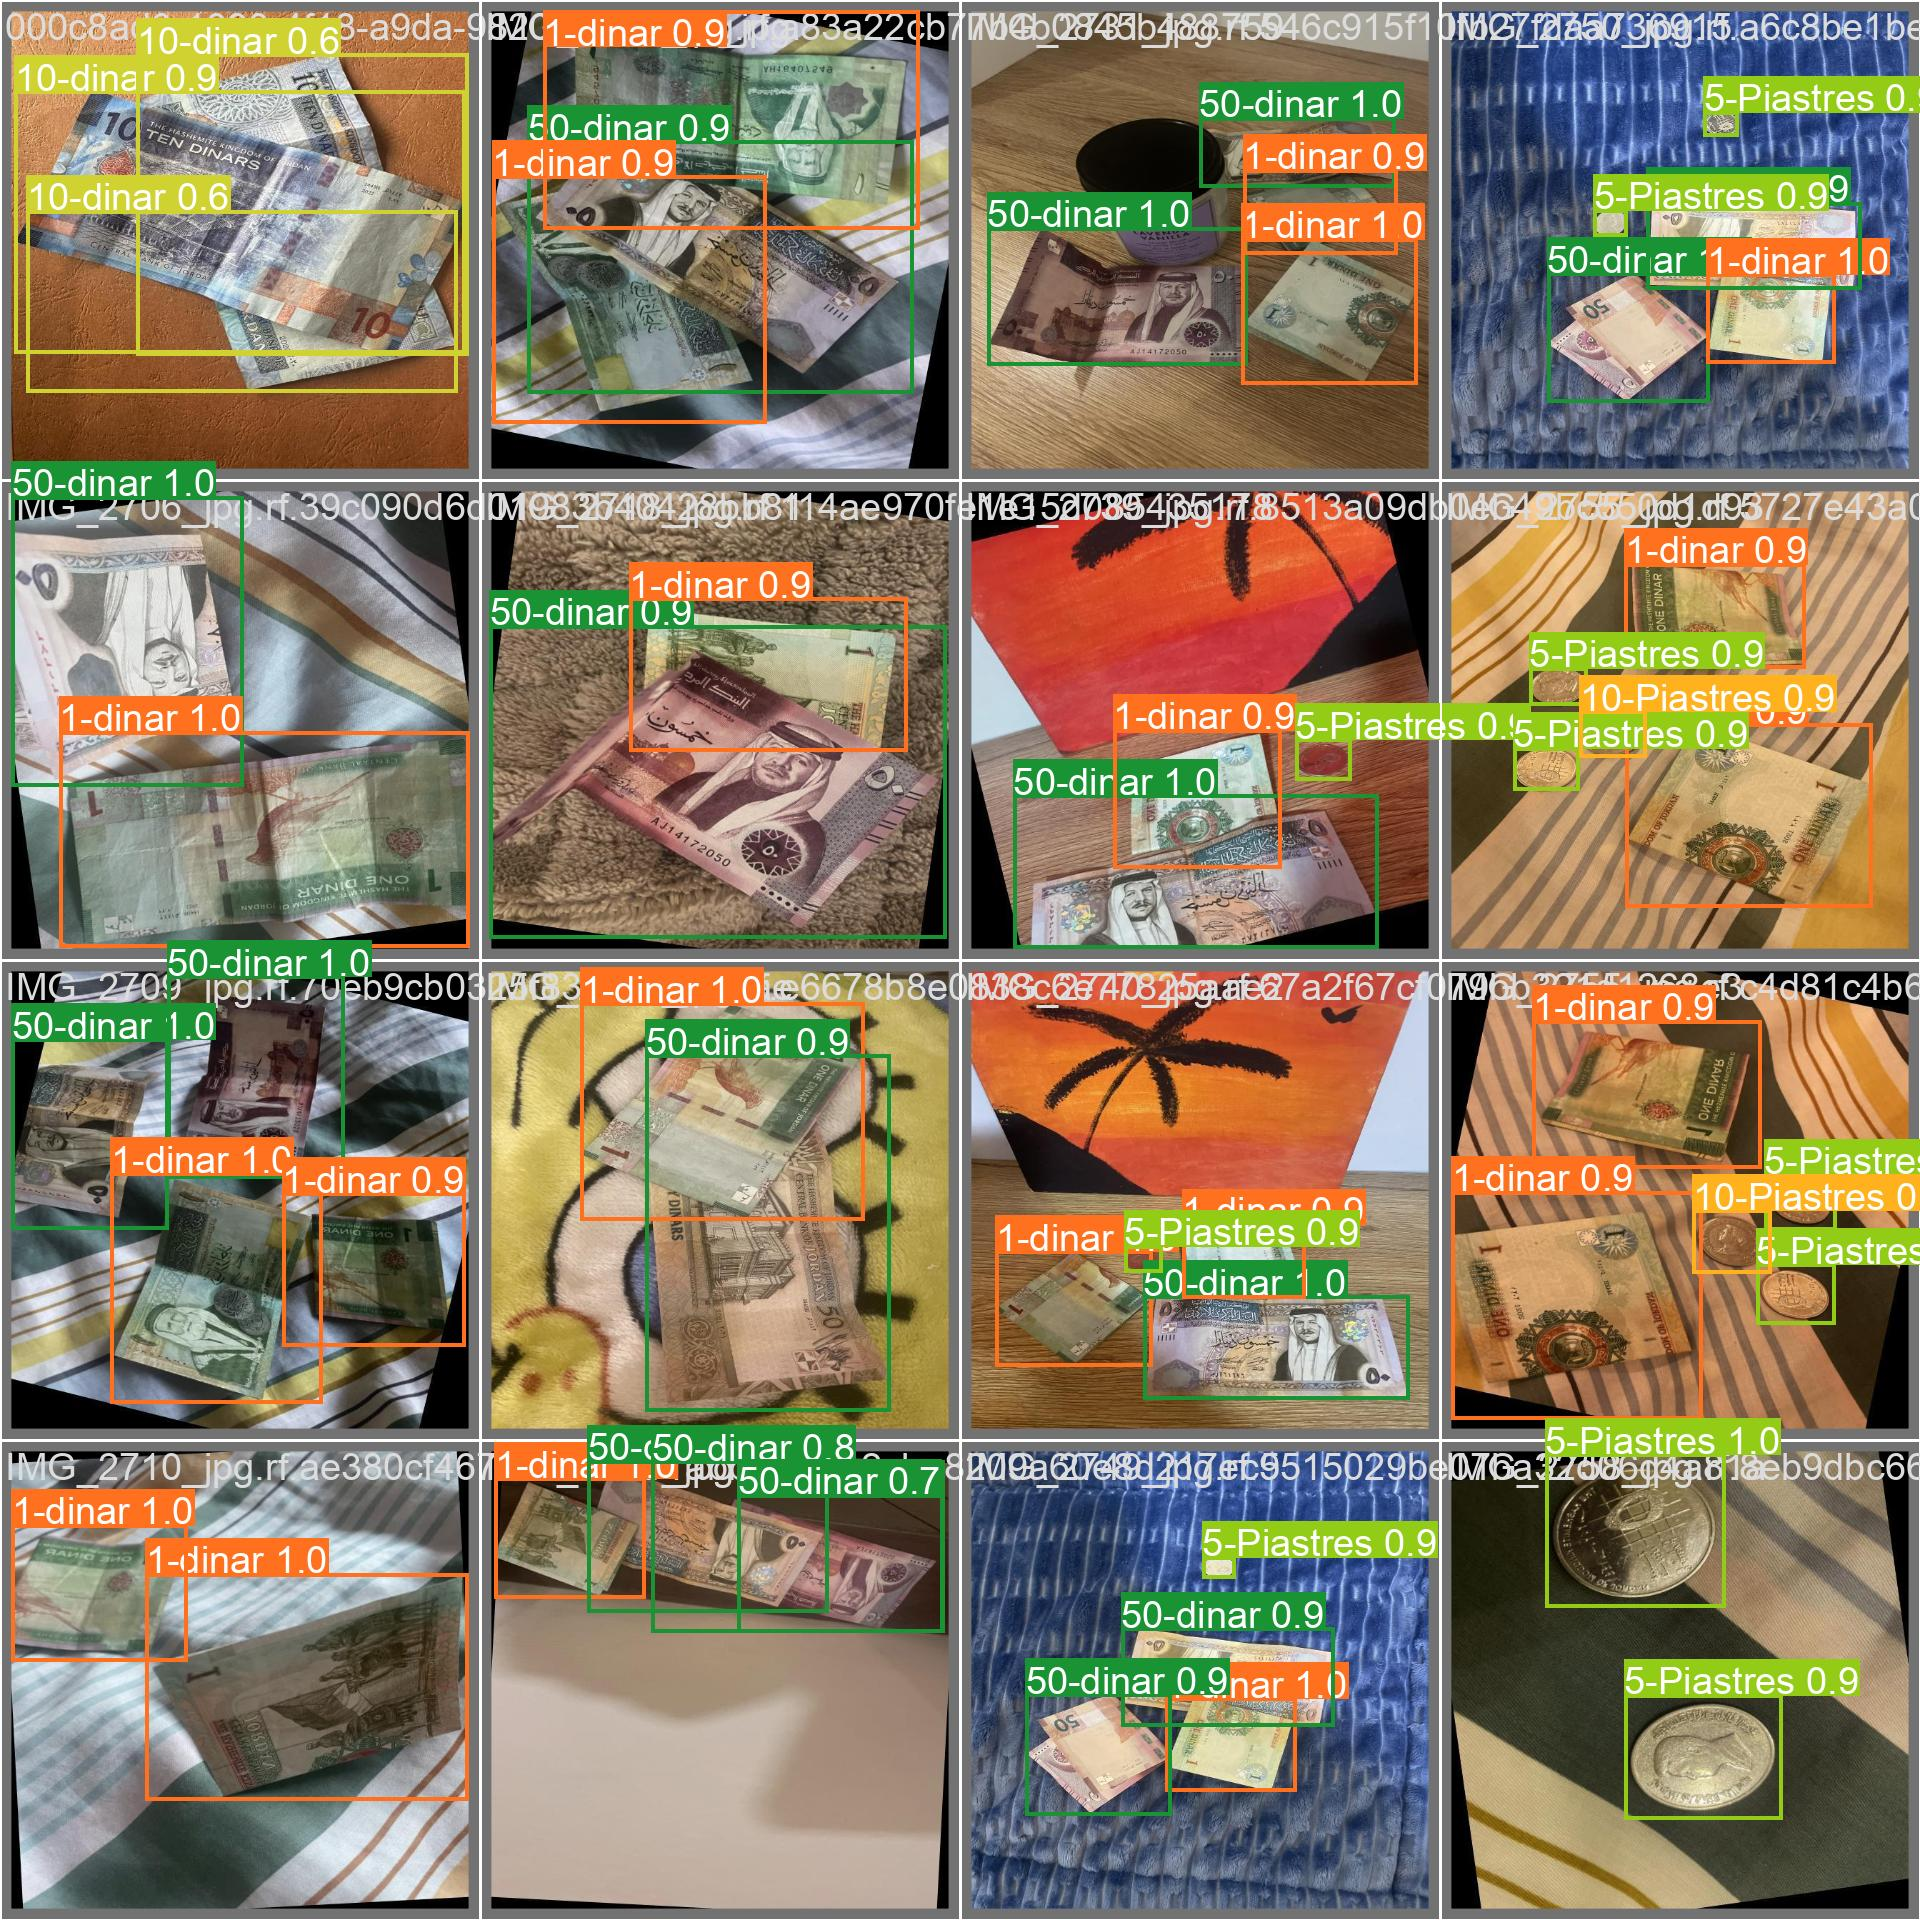

In [11]:
Image(filename='/content/drive/MyDrive/Coins JD Object Detection & Counting/runs/detect/val7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model="/content/drive/MyDrive/Coins JD Object Detection & Counting/runs/detect/train7/weights/best.pt" data="{dataset.location}/data.yaml"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43613547 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1M6Xs8gOXXYNLH_0bOvekY60jFeT08_Mz/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/valid/labels.cache... 237 images, 0 backgrounds, 0 corrupt: 100% 237/237 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:15<00:00,  1.02s/it]
                   all        237        599      0.979      0.975      0.989      0.903
             1-2-dinar        237         63      0.992          1      0.995      0.933
             1-4-dinar        237         75          1      0.975       0.99      0.877
               1-dinar        237         75      0.983      0.987      0.994      0.923
           10-Piastres        237         62      0.894      0.984       0.98      0.869
              10-din

## Inference with Custom Model

In [13]:
!yolo task=detect mode=predict model="runs/detect/train7/weights/best.pt" conf=0.60 source="Jordan-Coins-Detection-4/test/images" save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43613547 parameters, 0 gradients, 164.9 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/214 /content/drive/MyDrive/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/test/images/2aa216dc-4d06-4340-b20e-a7dcd108b250_jpg.rf.5ffa5e5f02cb7fb4029d3d48c45aed45.jpg: 640x640 1 20-dinar, 62.8ms
image 2/214 /content/drive/MyDrive/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/test/images/4bdbb5a9-8818-4d10-8e63-172525907dfb_jpg.rf.de4ef0790f6d235b06abe1ace6d13ff1.jpg: 640x640 1 20-dinar, 62.9ms
image 3/214 /content/drive/MyDrive/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/test/images/57c2f47e-2ede-4618-8ae0-89e7a0e76ee8_jpg.rf.282326fc6200a181f4c1a3942c53848c.jpg: 640x640 1 20-dinar, 63.2ms
image 4/214 /content/drive/MyDrive/Coins JD Object Detection & Counting/Jordan-Coins-Detection-4/test/images/57d53c47-72f8-46b0-a4a1-

**NOTE:** Let's take a look at few results.

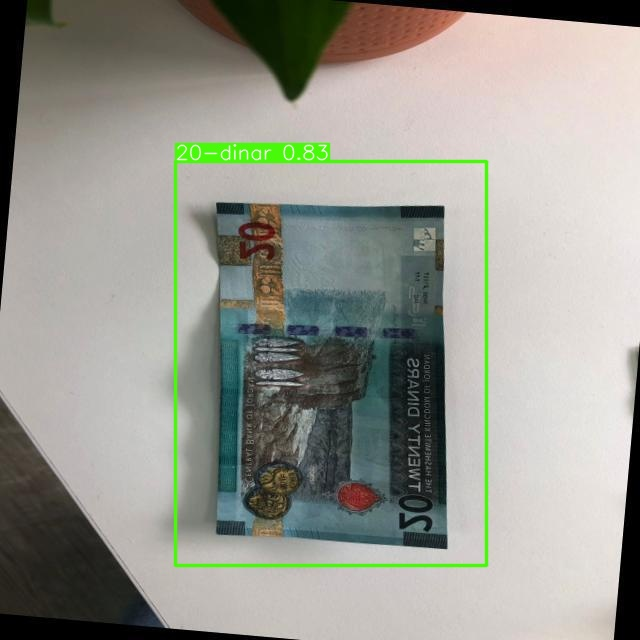

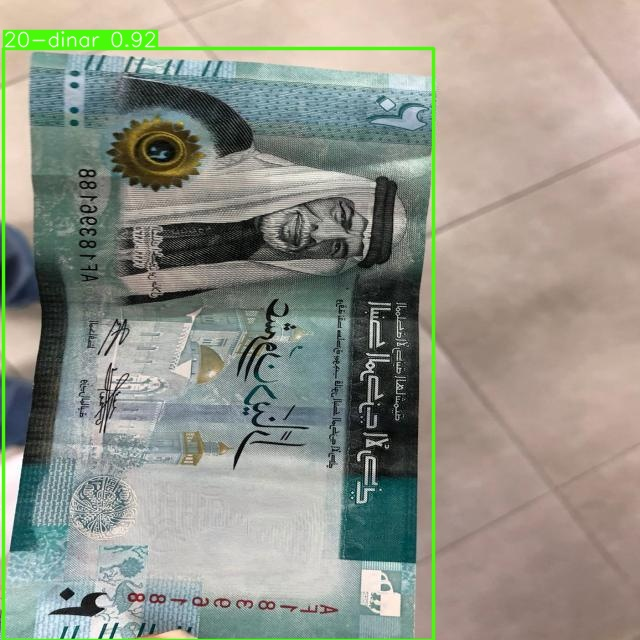

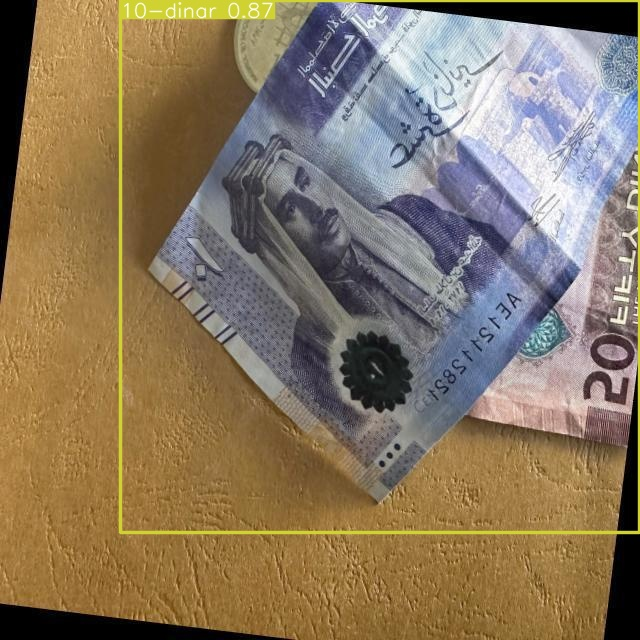

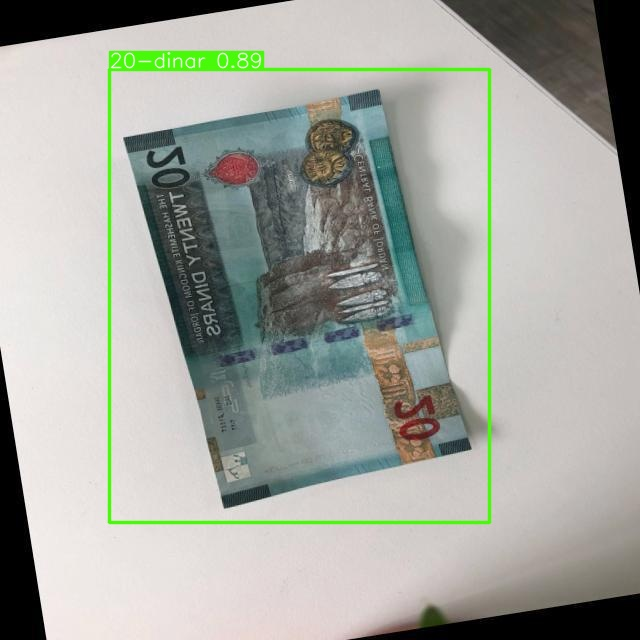

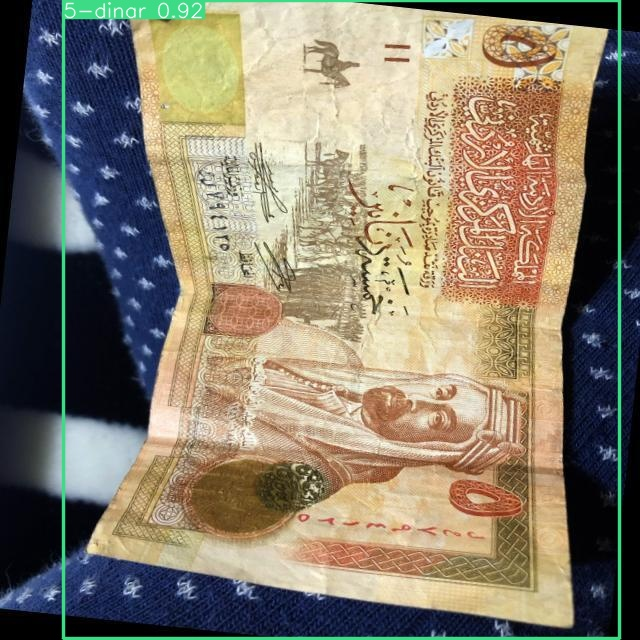

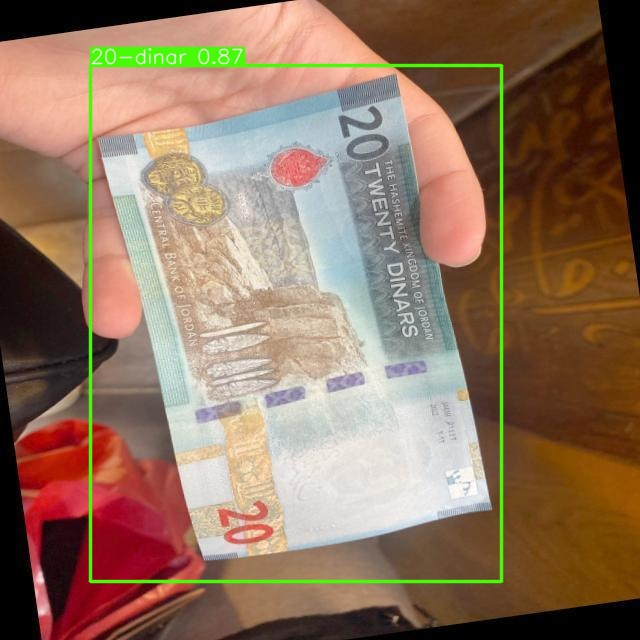

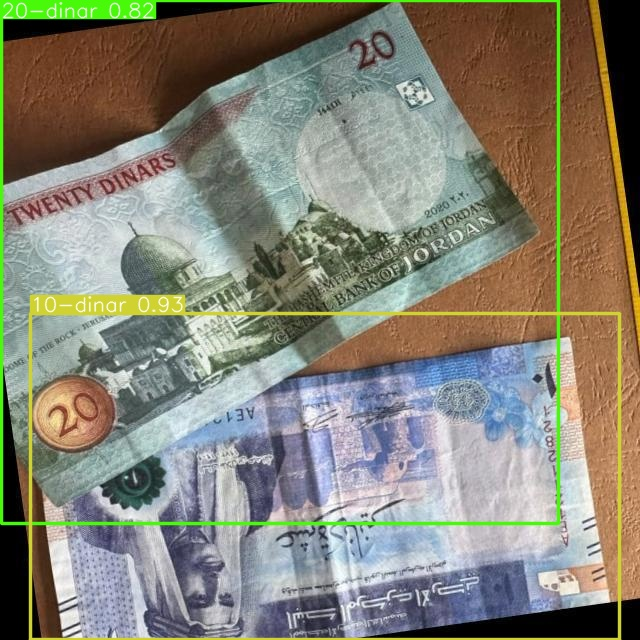

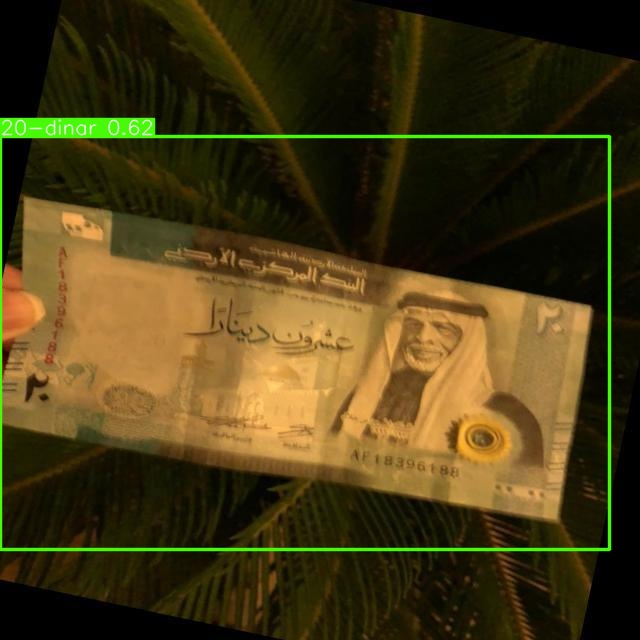

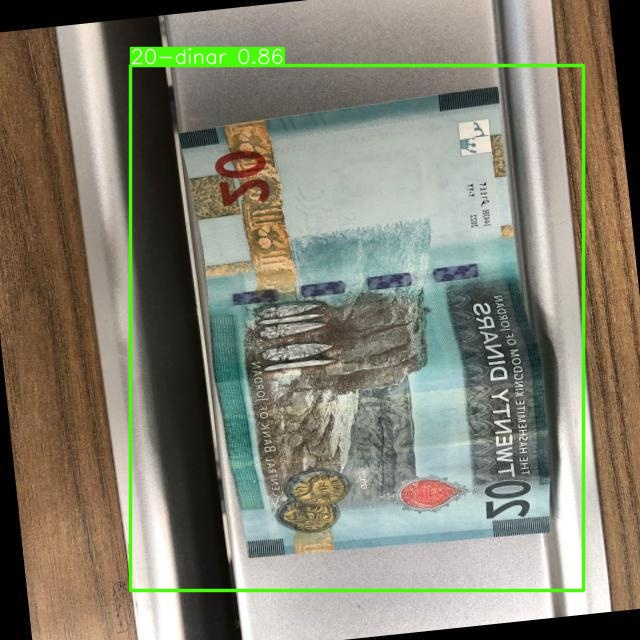

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[6:15]:
      display(Image(filename=image_path, width=400))
      print("\n")

# Upload Weights

In [22]:
project.version(5).deploy(model_type="yolov8", model_path="runs/detect/train7")

View the status of your deployment at: https://app.roboflow.com/coinsvision/jordan-coins-detection-nqdbs/5
Share your model with the world at: https://universe.roboflow.com/coinsvision/jordan-coins-detection-nqdbs/model/5
